## Exploratory data analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
commit_metrics_df = pd.read_csv("data/commit_metrics_python-nvd3.csv")

commit_metrics_df['date'] = pd.to_datetime(commit_metrics_df['date'], utc=True)

In [10]:
commit_metrics_df.head()

,Unnamed: 0,hash,author,date,commit_message,is_merge,codebase_size,lines_changed,total_lines_changed,insertions,deletions,dmm_unit_size,dmm_unit_complexity,dmm_unit_interfacing
0,0,9ab86189068a665bea7110bc3e19edcfc4b0587e,Areski Belaid,2013-04-08 10:46:24+00:00,import nvd3 python,False,442,442,442,442,0,0.467949,0.467949,0.429487
1,1,a586acde31b11e85e0d3c1a3320c18b331f0d68c,Areski Belaid,2013-04-08 10:56:02+00:00,project skel,False,627,185,627,185,0,0.181818,0.181818,0.181818
2,2,9ecf439757aa8de067f47bd63414aee9ce19540a,Areski Belaid,2013-04-08 11:12:14+00:00,add docs,False,1326,703,1330,701,2,NaN,NaN,NaN
3,3,192162cfdb9ba9b862499522467914dbc3c7bd51,Areski Belaid,2013-04-08 11:25:13+00:00,clean up code header / add more info on the to...,False,1304,64,1394,21,43,NaN,NaN,NaN
4,4,80bc5c1efc72bb02148b7736dcc015e479bcba92,Areski Belaid,2013-04-08 11:58:25+00:00,improve samples data,False,1315,89,1483,50,39,1.000000,0.000000,0.000000


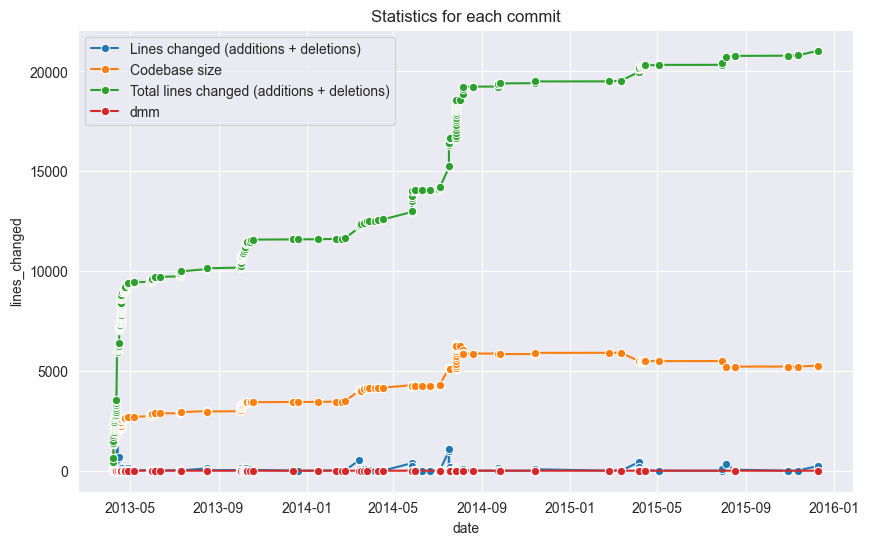

In [7]:
plt.figure(figsize=(10, 6))
commit_metrics_until_stagnant = commit_metrics_df[commit_metrics_df['date'] < pd.Timestamp(2017, 1, 1, 12).tz_localize('Europe/Stockholm')]
sns.lineplot(data=commit_metrics_until_stagnant, x='date', y='lines_changed', marker='o', label='Lines changed (additions + deletions)')
sns.lineplot(data=commit_metrics_until_stagnant, x='date', y='codebase_size', marker='o', label='Codebase size')
sns.lineplot(data=commit_metrics_until_stagnant, x='date', y='total_lines_changed', marker='o', label='Total lines changed (additions + deletions)')
plt.legend()
plt.title("Statistics for each commit");